# Simulating the Monty Hall Problem using a Quantum Computer

## Introduction
In this notebook, we demonstrate the culculation of the probabilities of the Monty Hall problem using a quantum computer.
However, as no perfect quantum computers currently exist in the world (known as _FTQCs_ for _fault-tolerant quantum computers_), we use the [Qiskit](https://qiskit.org/documentation/) simulator instead.
Leaving aside the limitations of current quantum computers, it is possible to use a real quantum computer by swapping backend instances in the code of this notebook.

### The Monty Hall problem
Here, we briefly explain about the Monty Hall problem.
According to [Wikipedia](https://en.wikipedia.org/wiki/Monty_Hall_problem):
> _Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?_

Hereafter, we will discuss the mathematics of the problem.
The formulation is as follows.

__Problem__. _Let $X,X',Y$ and $Z$ be $\{0,1,2\}$-valued random variables defined on a probability space $(\Omega,\mathcal{F},P)$, and suppose $X$ and $Y$ are independent. The probability laws of $Y$ and $Z$ are given by:
\begin{align*}
    & \displaystyle P(Y=0)=P(Y=1)=P(Y=2)=\frac{1}{3},  \\[.5em]
     & P(Z=i\mid X=j, Y=k)=
    \begin{cases}
        1,                         & i,j,k\in\{0,1,2\},\, i\neq j\neq k,\\[.5em]
        \displaystyle \frac{1}{2}, & i,j,k\in\{0,1,2\},\,i\neq j,\,j=k, \\[.5em]
        0, & \textrm{otherwise.}
    \end{cases}
\end{align*}
In addition, the probability law of $X'$ is defined as:
\begin{align*}
    P(X'=i\mid X=j,Z=k)
    &=
    \begin{cases}
        1, & i\neq j,k, \\[.5em]
        0, & \textrm{otherwise.}
    \end{cases}
\end{align*}
Then, calculate the probability $P(X'=Y)$._

We instantly see that $P(X=Z)=P(Y=Z)=P(X'=Z)=0$ by the assumptions above.

Corresponding to the statement of the Monty Hall problem, $X$, $Y$, $Z$, and $X'$ denote the numbers of the doors that "you" choose, the door with a car behind it, the door the host opens, and the door to which "you" switch after the host opens a door, respectively.

The values for the case in the table below are $X=2$, $Y=2$, $Z=1$, and $X'=0$, for example.

|                      | Door 2 | Door 1 | Door 0 | 
| :------------------: | :----: | :----: | :----: | 
| Player ("You") picks | $X$    |        |        | 
| Car behind           | $Y$    |        |        | 
| Player switches to   |        |        | $X'$   | 
| Host opens           |        | $Z$    |        |    |     |    |    |    |    | 

$P(X'=Y)$ is the probability that "you" will win the car if you change the doors after the host has opened a goat's.
If $P(X'=Y)>P(X=Y)=1/3$, then we can conclude that "you" should change the doors.

### The solution to the Monty Hall problem
We can get the probability $P(X'=Y)$ as follows:
\begin{align*}
    P(X'=Y)
    &= \sum_{i\neq j\neq k}P(X=i,Y=j,Z=k) \\
    &= \sum_{i\neq j\neq k}P(Z=k\mid X=i,Y=j)P(X=i)P(Y=j) \\
    &= \sum_{i\neq j}P(X=i)P(Y=j) \\
    &= \frac{2}{3}.
\end{align*}
Thus, as mentioned above, we can conclude that the player, "you", should change the doors.
This conclusion is indepent of the probability law of $X$ since $P(Y=0)=P(Y=1)=P(Y=2)$.

Furthermore, in general, we have $P(X\neq Y)=P(X'=Y)$, as indicated by the third equality above.

## Implementation of Quantum Circuits
In the following, we equate the numbers 0,1,2 with the bit strings 001,010,100, respectively. This ordering aligns with the qubit numbering convention used in Qiskit, and the positions where "1" appears in these strings denote the respective door numbers.
Each random variable defined above is assigned to every set of three qubits on a quantum circuit, represented as $|x_2x_1x_0\rangle|y_2y_1y_0\rangle|x'_2x'_1x'_0\rangle|z_2z_1z_0\rangle$. For instance, $x_2x_1x_0\in\{001,010,100\}$ represents a bit string of $X$, and other strings of random variables are represented in the same manner.

For example, the quantum state is $|100\rangle|100\rangle|001\rangle|010\rangle$ in the case below.
|                      | Door 2 | Door 1 | Door 0 | Bit 2 | Bit 1 | Bit 0 | 
| :------------------: | :----: | :----: | :----: | :---: | :---: | :---: | 
| Player ("You") picks | $X$    |        |        | 1     | 0     | 0     | 
| Car behind           | $Y$    |        |        | 1     | 0     | 0     | 
| Player switches to   |        |        | $X'$   | 0     | 0     | 1     | 
| Host opens           |        | $Z$    |        | 0     | 1     | 0     |

### Implementation of the distributions of $X$ and $Y$
To begin with, we describe how to implement the distributions to choose doors.

Let $\theta_0,\theta_2\in\mathbb{R}$.
We have
\begin{align*}
    |000\rangle
    & \xrightarrow{I\otimes I\otimes R_y(\theta_0)} \cos\frac{\theta_0}{2} |000\rangle + \sin\frac{\theta_0}{2} |001\rangle \\[.5em]
    & \xrightarrow{I\otimes I\otimes \textrm{NOT}} \cos\frac{\theta_0}{2} |001\rangle + \sin\frac{\theta_0}{2} |000\rangle \\[.5em]
    & \xrightarrow{I\otimes\textrm{CNOT}(0;1)} \cos\frac{\theta_0}{2} |011\rangle + \sin\frac{\theta_0}{2} |000\rangle \\[.5em]
    & \xrightarrow{\textrm{CC-}R_y(\theta_1)(0,1;2)} \cos\frac{\theta_1}{2}\cos\frac{\theta_0}{2} |011\rangle + \sin\frac{\theta_1}{2}\cos\frac{\theta_0}{2} |111\rangle + \sin\frac{\theta_0}{2} |000\rangle \\[.5em]
    & \xrightarrow{I\otimes I\otimes \textrm{NOT}} \cos\frac{\theta_1}{2}\cos\frac{\theta_0}{2} |010\rangle + \sin\frac{\theta_1}{2}\cos\frac{\theta_0}{2} |110\rangle + \sin\frac{\theta_0}{2} |001\rangle \\[.5em]
    & \xrightarrow{\textrm{CNOT}(2;1)\otimes I} \cos\frac{\theta_1}{2}\cos\frac{\theta_0}{2} |010\rangle + \sin\frac{\theta_1}{2}\cos\frac{\theta_0}{2} |100\rangle + \sin\frac{\theta_0}{2} |001\rangle,
\end{align*}
where $R_y(\theta)$ denotes the rotation gate around the $y$-axis of angle $\theta$, and $\textrm{CNOT}(i;j)$ and $\textrm{CC-$R_y$}(i,j;k)$ represent the conrolled $\textrm{NOT}$ gate on qubit $j$ controlled by qubit $i$, and the controlled $R_y$ gate on qubit $k$ controlled by qubit $i$ and $j$, respectively.

Then, letting $p_0+p_1+p_2=1$, $p_0,p_1,p_2\geq 0$, $\theta_0 = 2\arccos(\sqrt{1-p_0})$ and $\theta_1=2\arccos(\sqrt{p_1/(1-p_0)})$, we obtain the terminal state as
\begin{align*}
    \sqrt{p_0}|001\rangle + \sqrt{p_1}|010\rangle + \sqrt{p_2}|100\rangle.
\end{align*}
Note that we use the fact that $H|0\rangle=R_y(\pi/2)|0\rangle$ in the following.

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, transpile
from qiskit.circuit.library import HGate, RYGate
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

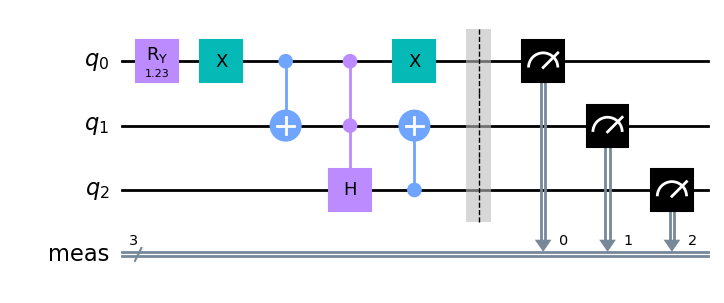

In [2]:
qr = QuantumRegister(3, 'q')
qc = QuantumCircuit(qr)
qc.ry(2 * np.arccos(np.sqrt(2 / 3)), 0)
qc.x(0)
qc.cx(0, 1)
cch_gate = HGate().control(2)
qc.append(cch_gate, qr)
qc.x(0)
qc.cx(2, 1)
qc.measure_all()
qc.draw('mpl')

In [3]:
backend = AerSimulator()

{'010': 3341, '100': 3272, '001': 3387}


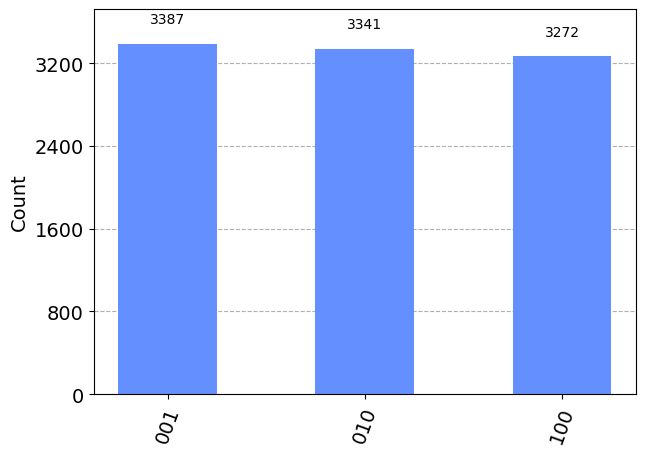

In [4]:
qc_compiled = transpile(qc, backend)
job_sim = backend.run(qc_compiled, shots=10000)
result_sim = job_sim.result()

counts = result_sim.get_counts(qc_compiled)
print(counts)

plot_histogram(counts)

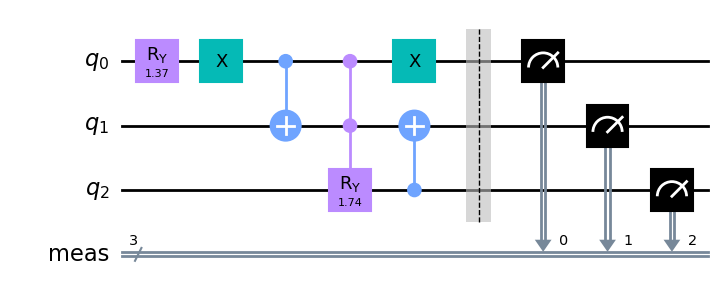

In [5]:
# p_001, p_010, p_100 = 1 - p001 - p010
p = [0.4, 0.25]

qr = QuantumRegister(3, 'q')
qc = QuantumCircuit(qr)
qc.ry(2 * np.arccos(np.sqrt(1 - p[0])), 0)
qc.x(0)
qc.cx(0, 1)
ccry_gate = RYGate(2 * np.arccos(np.sqrt(p[1] / (1 - p[0])))).control(2)
qc.append(ccry_gate, qr)
qc.x(0)
qc.cx(2, 1)
qc.measure_all()
qc.draw('mpl')

{'100': 3494, '001': 4019, '010': 2487}


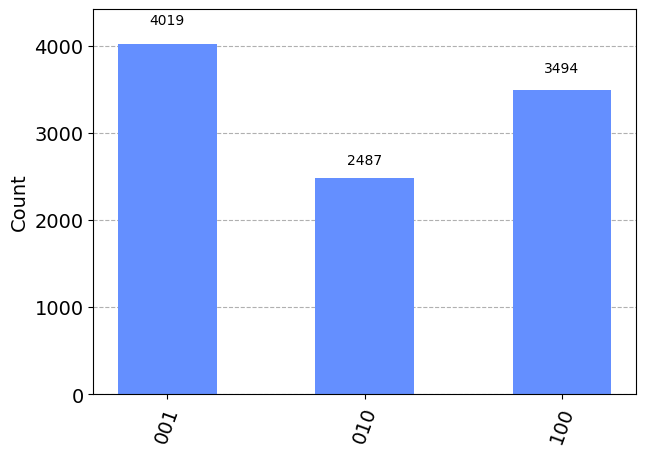

In [6]:
qc_compiled = transpile(qc, backend)
job_sim = backend.run(qc_compiled, shots=10000)
result_sim = job_sim.result()

counts = result_sim.get_counts(qc_compiled)
print(counts)

plot_histogram(counts)

### Implementation of the Monty Hall Game
Here, we introduce a Monty Hall game circuit.
This circuit basically consists of eleven layers.
The game's logic is implemented on this circuit in a straightforward manner, but in order to perform the logic, four additional ancilla qubits are needed.
A brief description of the circuit is as follows and we can find circuit diagrams of this on after the next cells.
1. Implement the distributions of $X$ and $Y$.
2. Perform a bitwise OR operation on $X$ and $Y$, and temporarily store the result on the qubits of $X'$.
3. Store information about the doors that were not selected by applying NOT operation.
4. Division into two cases with probability 1/2, according to $Z$.
5. Search for "1" from the right; a door for $Z$.
6. Recover the ancilla bit.
7. Switch to the other case of $Z$.
8. Search for "1" from the left; a door for $Z$.
9. Reset the temporarily used qubits.
10. Perform a bitwise OR operation on $X$ and $Z$.
11. Store a door to be picked by $X'$ by applying NOT operation.

In [7]:
def monty_hall_circuit(x_probability, y_probability=None, barrier=True, usereset=False, marking_bit=False, name='monty hall circuit'):
    '''
        x_probability: [P(X=001), P(X=010)]
                        P(X=100)=1-P(X=001)-P(X=010)
    '''
    n_reset_qubits = 0 if usereset else 3
    qr_x = QuantumRegister(3, 'X')
    qr_y = QuantumRegister(3, 'Y')
    qr_xy = QuantumRegister(3, 'X\'')
    qr_z = QuantumRegister(3, 'Z')
    qr_a = QuantumRegister(1 + n_reset_qubits, 'ancilla')
    if not marking_bit:
        qc = QuantumCircuit(qr_a, qr_z, qr_xy, qr_y, qr_x)
        n_qubit_start = qr_a.size + qr_z.size + qr_xy.size + qr_y.size
    else:
        qr_m = QuantumRegister(1, 'm')
        qc = QuantumCircuit(qr_m, qr_a, qr_z, qr_xy, qr_y, qr_x)
        n_qubit_start = qr_m.size + qr_a.size + qr_z.size + qr_xy.size + qr_y.size
    
    # Implement the distribution of X    
    p = x_probability
    qc.ry(2 * np.arccos(np.sqrt(1 - p[0])), n_qubit_start)
    qc.x(n_qubit_start)
    qc.cx(n_qubit_start, n_qubit_start + 1)
    ccry_gate = RYGate(2 * np.arccos(np.sqrt(p[1] / (1 - p[0])))).control(2)
    qc.append(ccry_gate, qr_x)
    qc.x(n_qubit_start)
    qc.cx(n_qubit_start + 2, n_qubit_start + 1)
    
    n_qubit_start += -qr_y.size
    
    # Implement the distribution of Y
    if y_probability is not None:
        p = y_probability
        qc.ry(2 * np.arccos(np.sqrt(1 - p[0])), n_qubit_start)
    else:
        qc.ry(2 * np.arccos(np.sqrt(2. / 3.)), n_qubit_start)
    qc.x(n_qubit_start)
    qc.cx(n_qubit_start, n_qubit_start + 1)
    if y_probability is not None:
        ccry_gate = RYGate(2 * np.arccos(np.sqrt(p[1] / (1 - p[0])))).control(2)
        qc.append(ccry_gate, qr_y)
    else:
        cch_gate = HGate().control(2)
        qc.append(cch_gate, qr_y)
    qc.x(n_qubit_start)
    qc.cx(n_qubit_start + 2, n_qubit_start + 1)
    
    n_qubit_start += -qr_xy.size
    
    # Create Or(X,Y) on the X' qubits, 
    # temporarily used for combination of X and Y
    if barrier: qc.barrier()
    for i in range(n_qubit_start, n_qubit_start + qr_xy.size + qr_y.size + qr_x.size):
        qc.x(i)
    
    for i in range(n_qubit_start, n_qubit_start + 3):
        qc.ccx(i + qr_xy.size, i + qr_xy.size + qr_y.size, i)
    
    for i in range(n_qubit_start + 3, n_qubit_start + 9):
        qc.x(i)
    
    # Take NOT(Or(X,Y))
    if barrier: qc.barrier()
    for i in range(n_qubit_start, n_qubit_start + 3):
        qc.x(i)

    n_qubit_start = qr_a.size if not marking_bit else qr_m.size + qr_a.size
    
    # Divide into 2 cases of probability 1/2
    if barrier: qc.barrier()
    qc.h(n_qubit_start - 1)
    
    # Search for "1" from the right
    if barrier: qc.barrier()
    for i in range(qr_z.size):
        qc.ccx(n_qubit_start - 1, i + n_qubit_start + 3, i + n_qubit_start)
        qc.cx(i + n_qubit_start, n_qubit_start - 1)
    
    # Restore ancilla
    if barrier: qc.barrier()
    for i in range(qr_z.size):
        qc.cx(i + n_qubit_start, n_qubit_start - 1)
    
    # Switch to the other case
    if barrier: qc.barrier()
    qc.x(n_qubit_start - 1)
    
    # Search for "1" from the left
    if barrier: qc.barrier()
    for i in range(qr_z.size):
        qc.ccx(n_qubit_start - 1, -i + n_qubit_start + 5, -i + n_qubit_start + 2)
        qc.cx(-i + n_qubit_start + 2, n_qubit_start - 1)

    n_qubit_start += qr_z.size

    # Reset the qubits for X'
    if barrier: qc.barrier()
    for i in range(qr_xy.size):
        if usereset:
            qc.reset(i + n_qubit_start)
        else:
            qc.swap(i + n_qubit_start, i + n_qubit_start - qr_z.size - 4)

    # Create Or(X,Z)
    if barrier: qc.barrier()
    for i in range(qr_xy.size):
        qc.cx(i + n_qubit_start - 3, i + n_qubit_start)
        qc.cx(i + n_qubit_start + qr_y.size + qr_xy.size, i + n_qubit_start)

    # Take Not(Or(X,Z))
    if barrier: qc.barrier()
    for i in range(qr_xy.size):
        qc.x(i + n_qubit_start)
 
    # mark when X'=Y
    if marking_bit:
        if barrier: qc.barrier()
        for i in range(qr_xy.size):
            qc.ccx(i + n_qubit_start, i + n_qubit_start + qr_xy.size, 0)
    
    qc.name = name
    return qc

X distribution: [0.50289222 0.13888926 0.35821851]


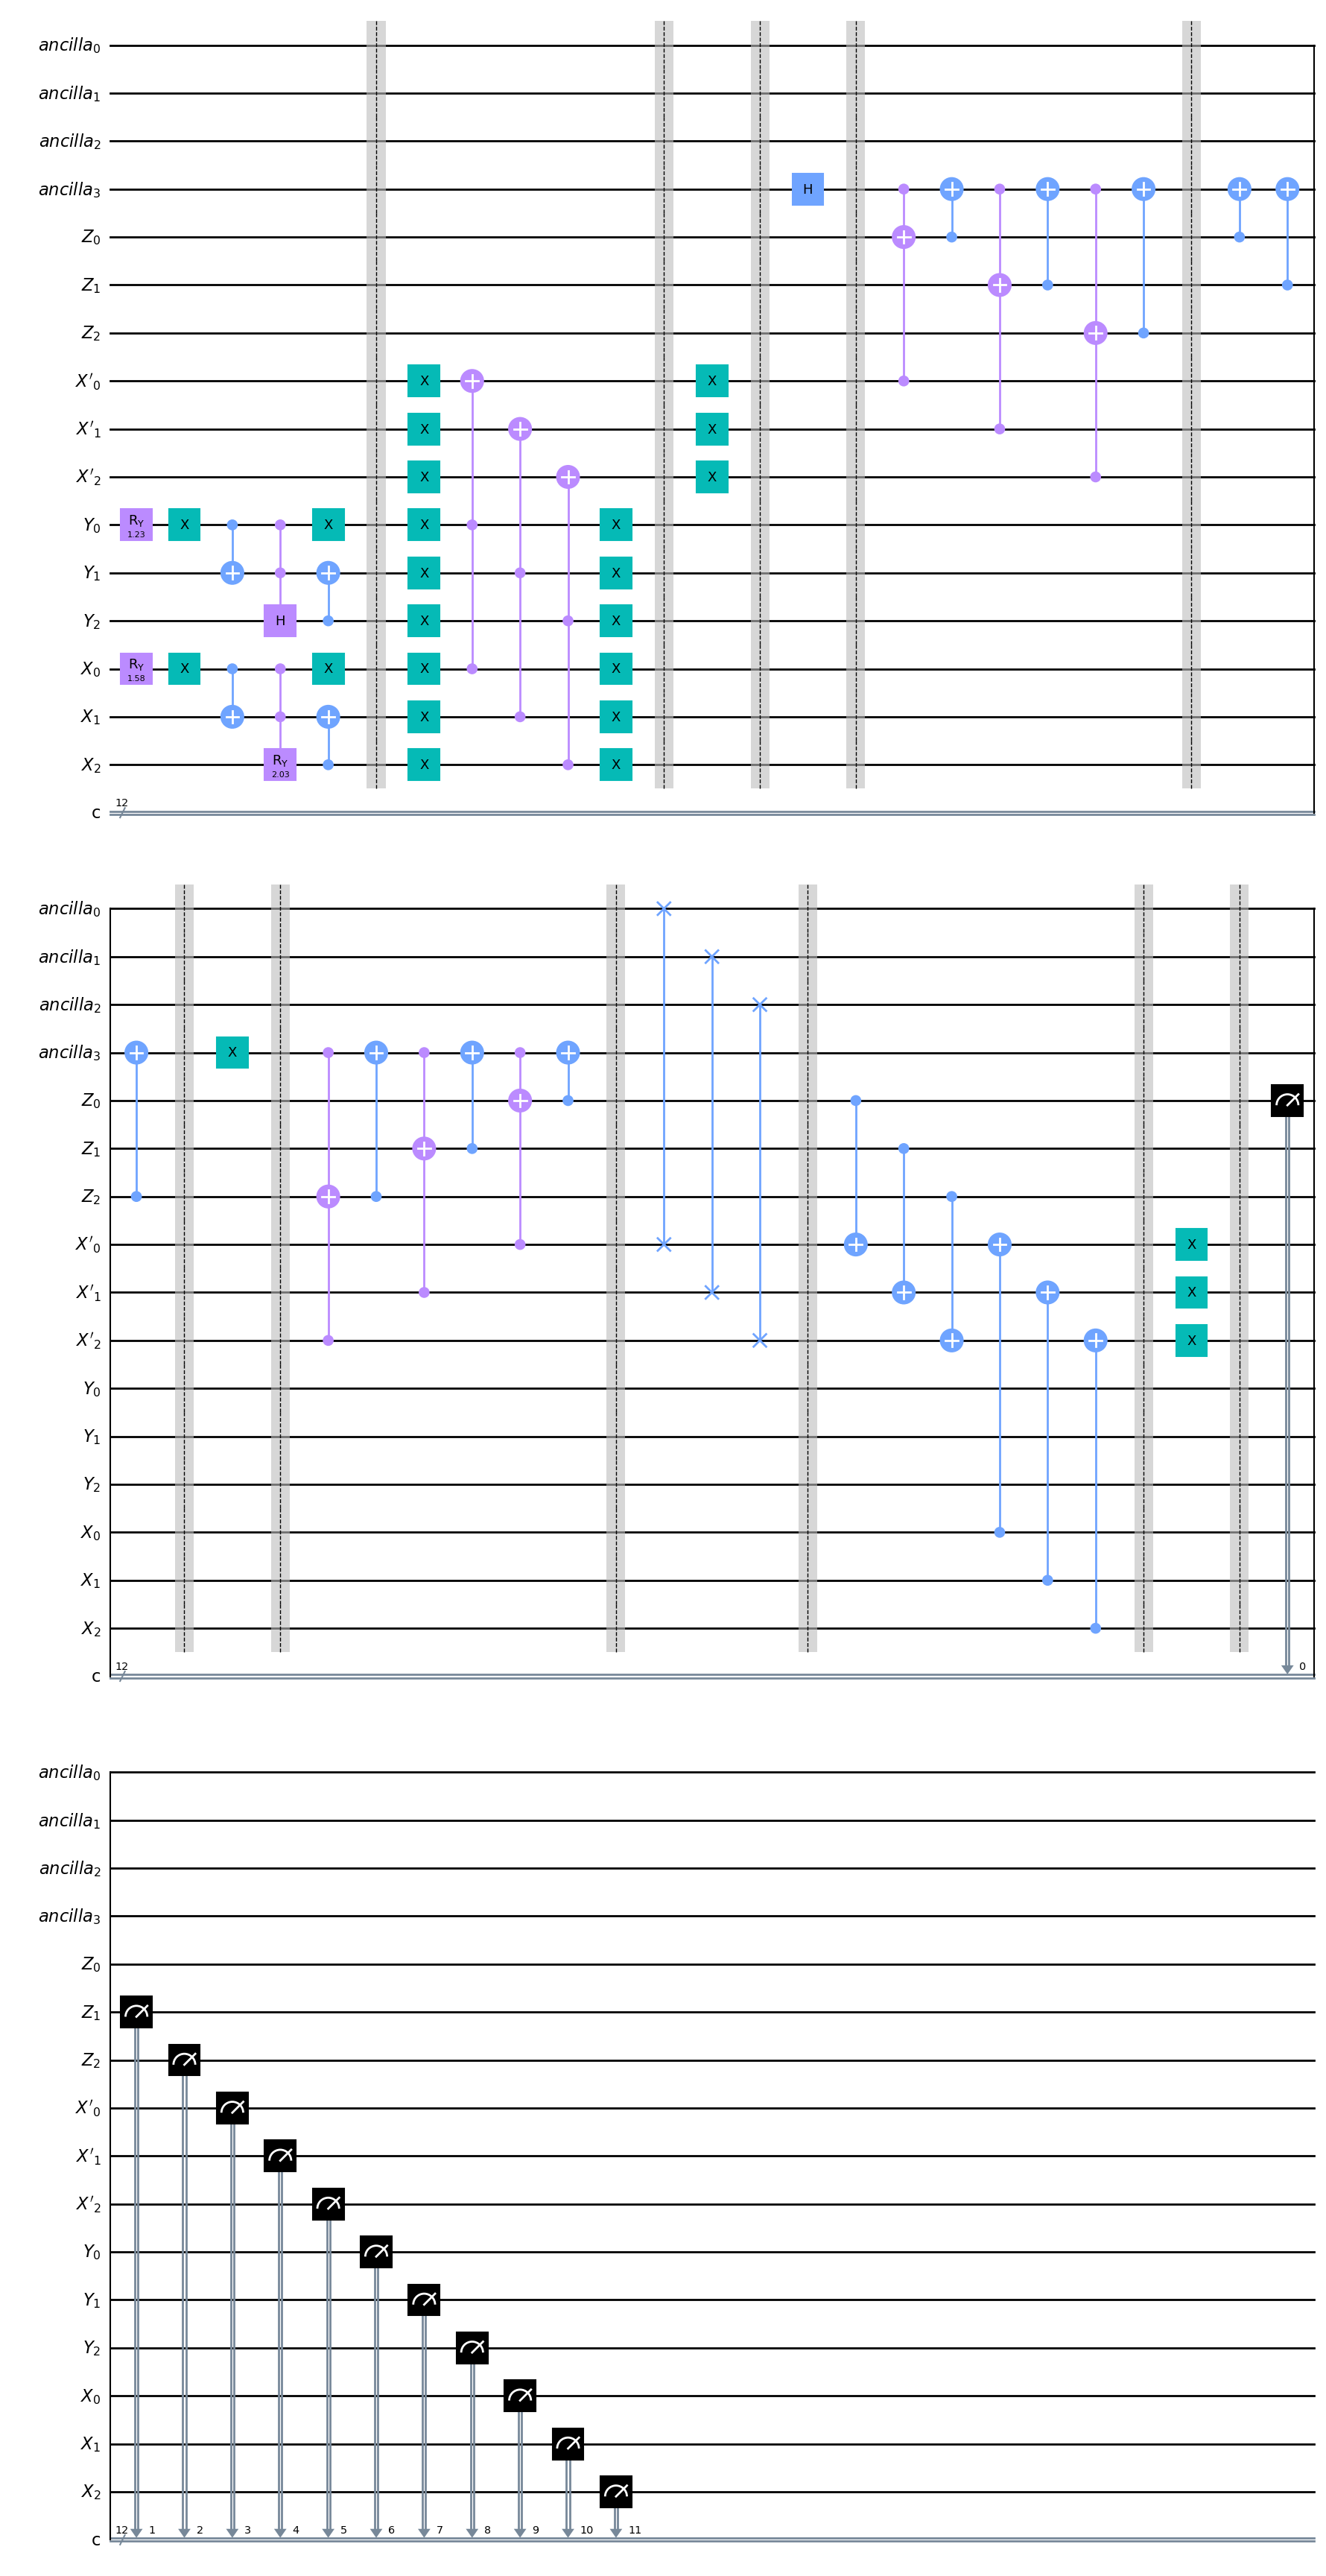

In [8]:
# p = [0.3, 0.1, 0.6]
np.random.seed(111)
p = np.random.rand(3)
p /= np.sum(p)
print('X distribution:', p)
qc = monty_hall_circuit(p, barrier=True)
qc.barrier()
cr = ClassicalRegister(12, 'c')
qc.add_register(cr)
qc.measure(list(range(4,16)), cr)
qc.draw('mpl')

{'001001010100': 8300, '100100010001': 6087, '010001001100': 4779, '100010010001': 11806, '001001100010': 8457, '001100100010': 16738, '001010010100': 16928, '100001001010': 11757, '100100001010': 5970, '010010001100': 2226, '010100100001': 4593, '010010100001': 2359}
CPU times: total: 1.91 s
Wall time: 259 ms


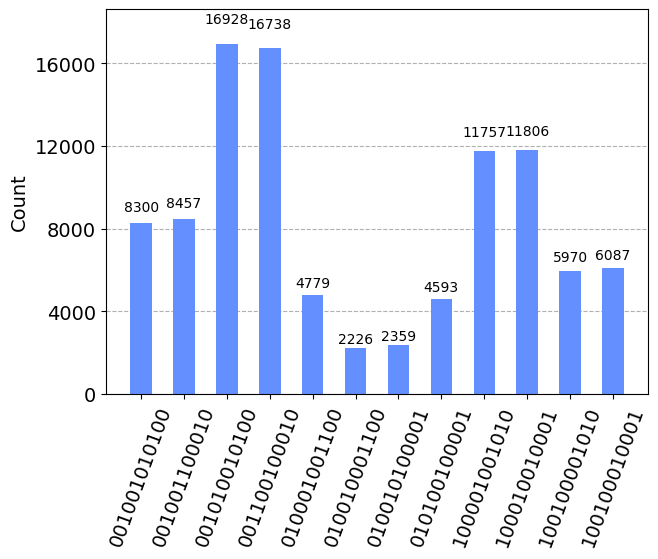

In [9]:
%%time
n_shots = 100000
qc_compiled = transpile(qc, backend)
job_sim = backend.run(qc_compiled, shots=n_shots)
result_sim = job_sim.result()

counts = result_sim.get_counts(qc_compiled)
print(counts)

plot_histogram(counts)

In [10]:
n_event_xy = np.sum([n_counts for observation, n_counts in counts.items() if observation[:3] == observation[3:6]])
print('P(X=Y)={}, {} samples'.format(n_event_xy / n_shots, n_shots))

n_event_xy2 = np.sum([n_counts for observation, n_counts in counts.items() if observation[6:9] == observation[3:6]])
print('P(X\'=Y)={}, {} samples'.format(n_event_xy2 / n_shots, n_shots))

P(X=Y)=0.33399, 100000 samples
P(X'=Y)=0.66601, 100000 samples


### Another Method of Measurement
We introduce another method to get the probability $P(X'=Y)$. 
An additional ancilla qubit is introduced to the circuit, serving as a marker that holds "1" for cases where $X'=Y$.
All we have to do is measure the marker qubit.

X distribution: [0.50289222 0.13888926 0.35821851]


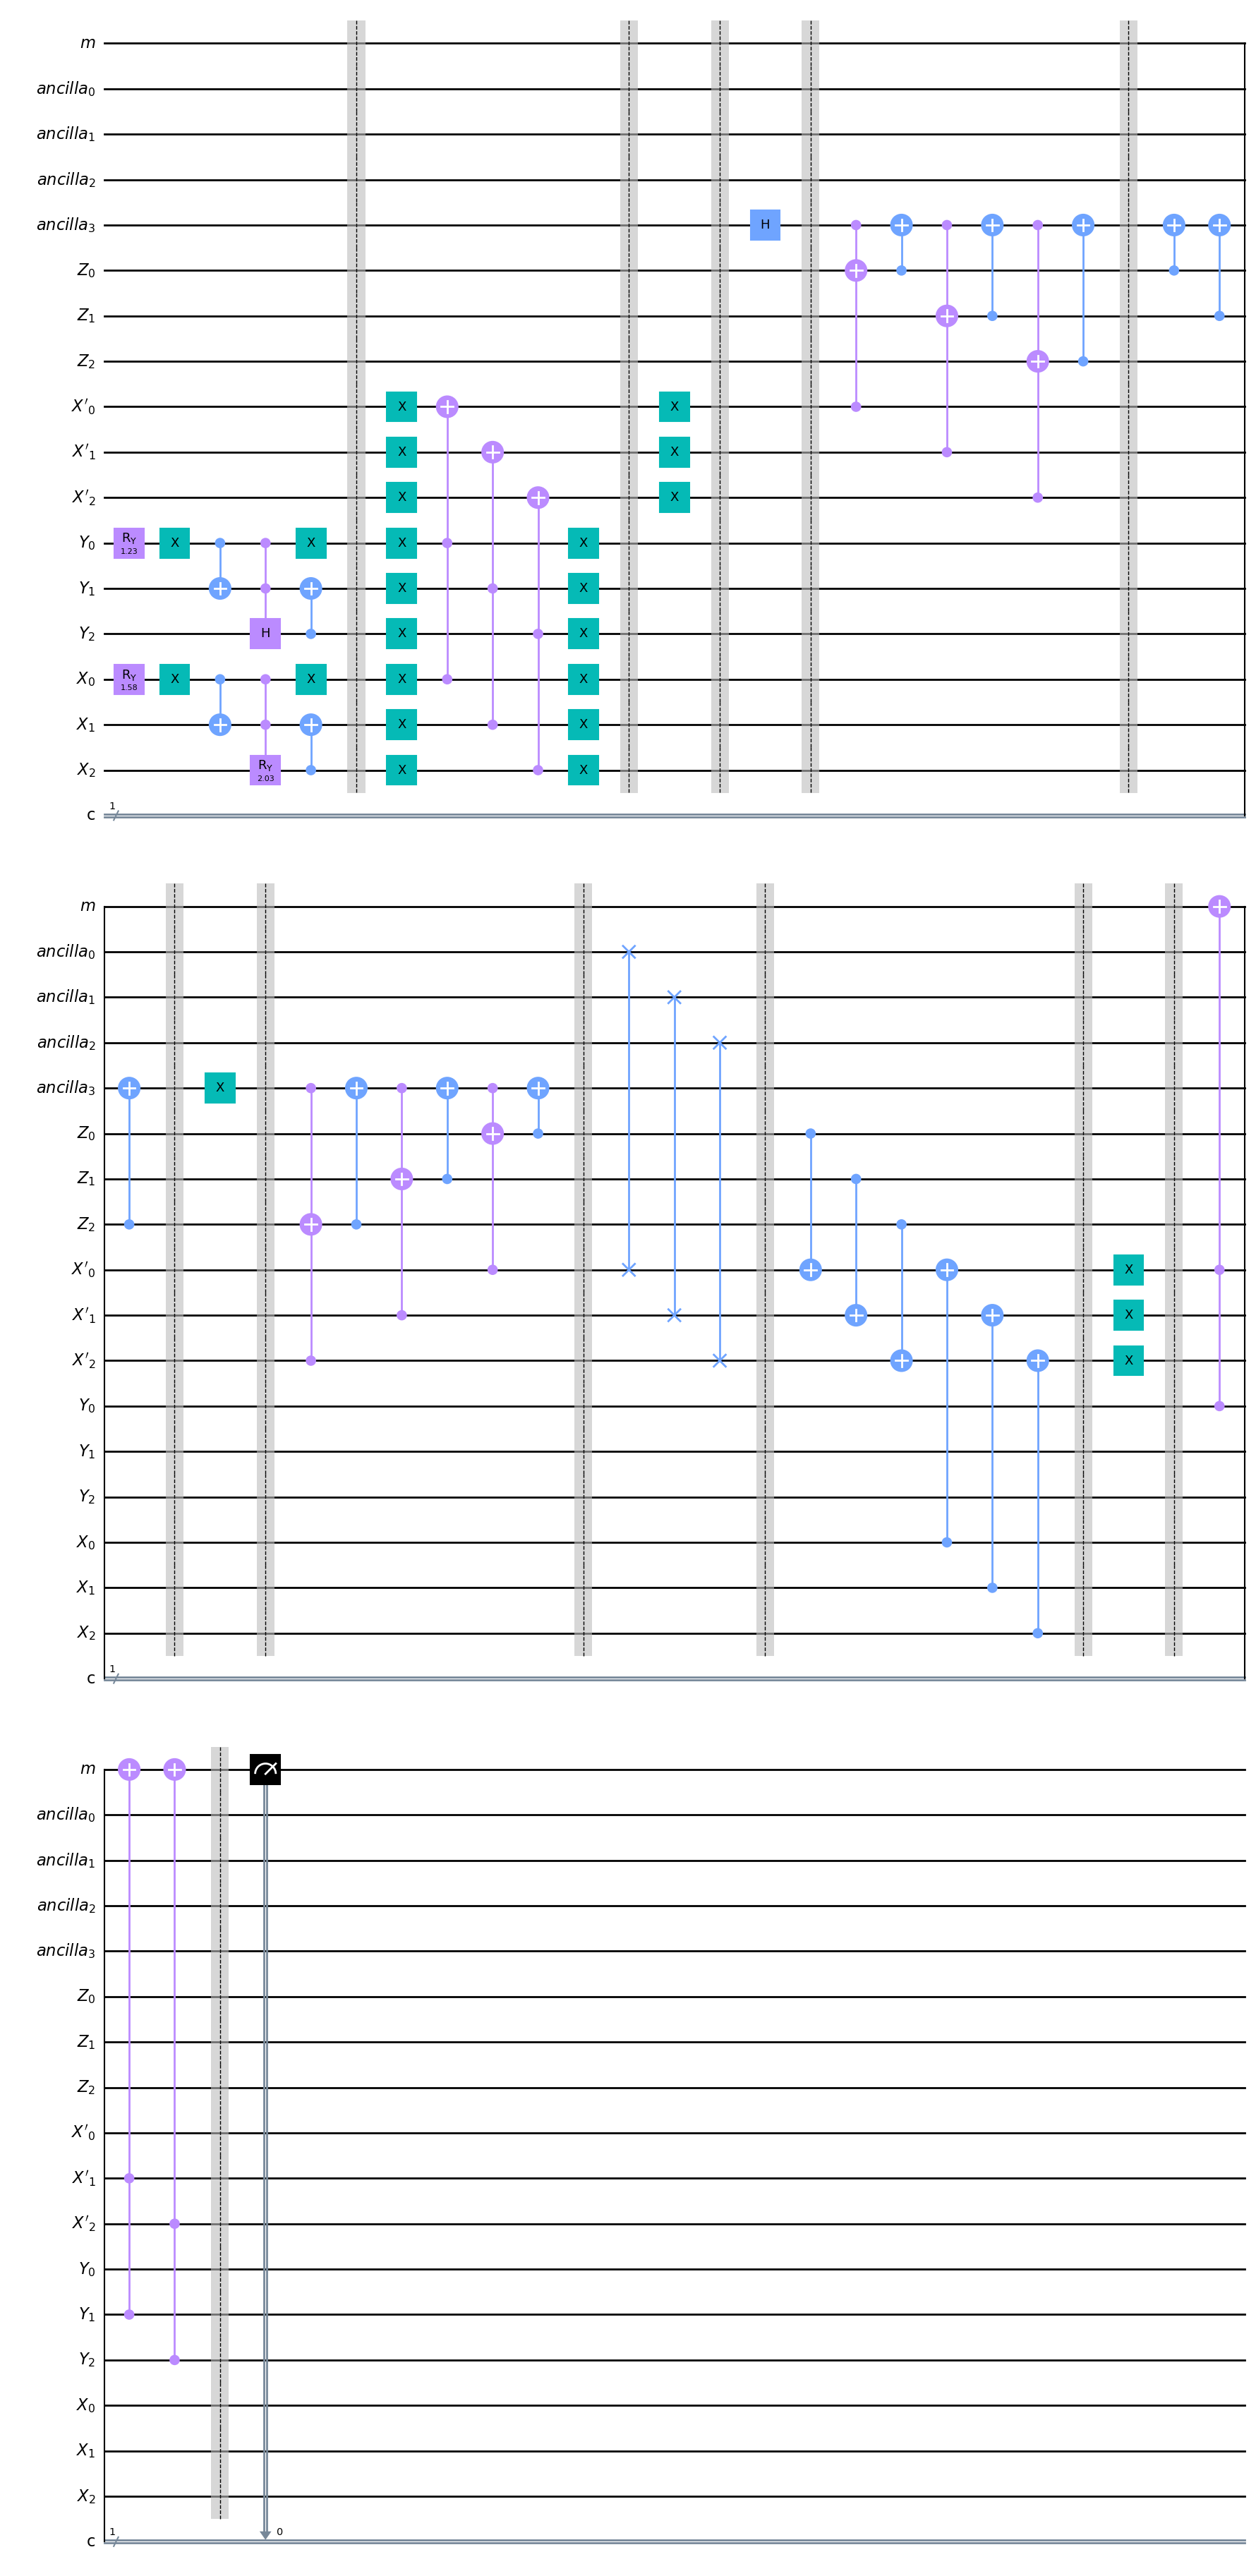

In [11]:
np.random.seed(111)
p = np.random.rand(3)
p /= np.sum(p)
print('X distribution:', p)
qc = monty_hall_circuit(p, barrier=True, marking_bit=True)
qc.barrier()
cr = ClassicalRegister(1, 'c')
qc.add_register(cr)
qc.measure(0, cr)
qc.draw('mpl')

{'1': 66555, '0': 33445}
P(X'=Y)=0.66555, 100000 samples
CPU times: total: 1.88 s
Wall time: 167 ms


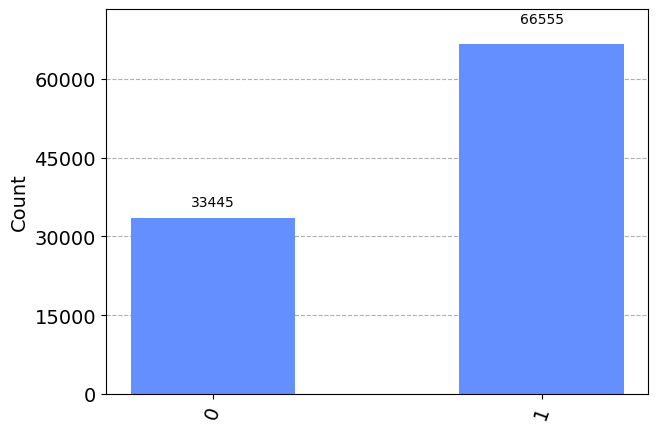

In [12]:
%%time
n_shots = 100000
qc_compiled = transpile(qc, backend)
job_sim = backend.run(qc_compiled, shots=n_shots)
result_sim = job_sim.result()

counts = result_sim.get_counts(qc_compiled)
print(counts)
print('P(X\'=Y)={}, {} samples'.format(counts['1'] / n_shots, n_shots))

plot_histogram(counts)

### Different Distributions of $Y$
We can experiment with various distributions of $Y$ other than $P(Y=0)=P(Y=1)=P(Y=2)$.

X distribution: [0.29938468 0.460807   0.23980832]
Y distribution: [0.3273796  0.29800542 0.37461498]


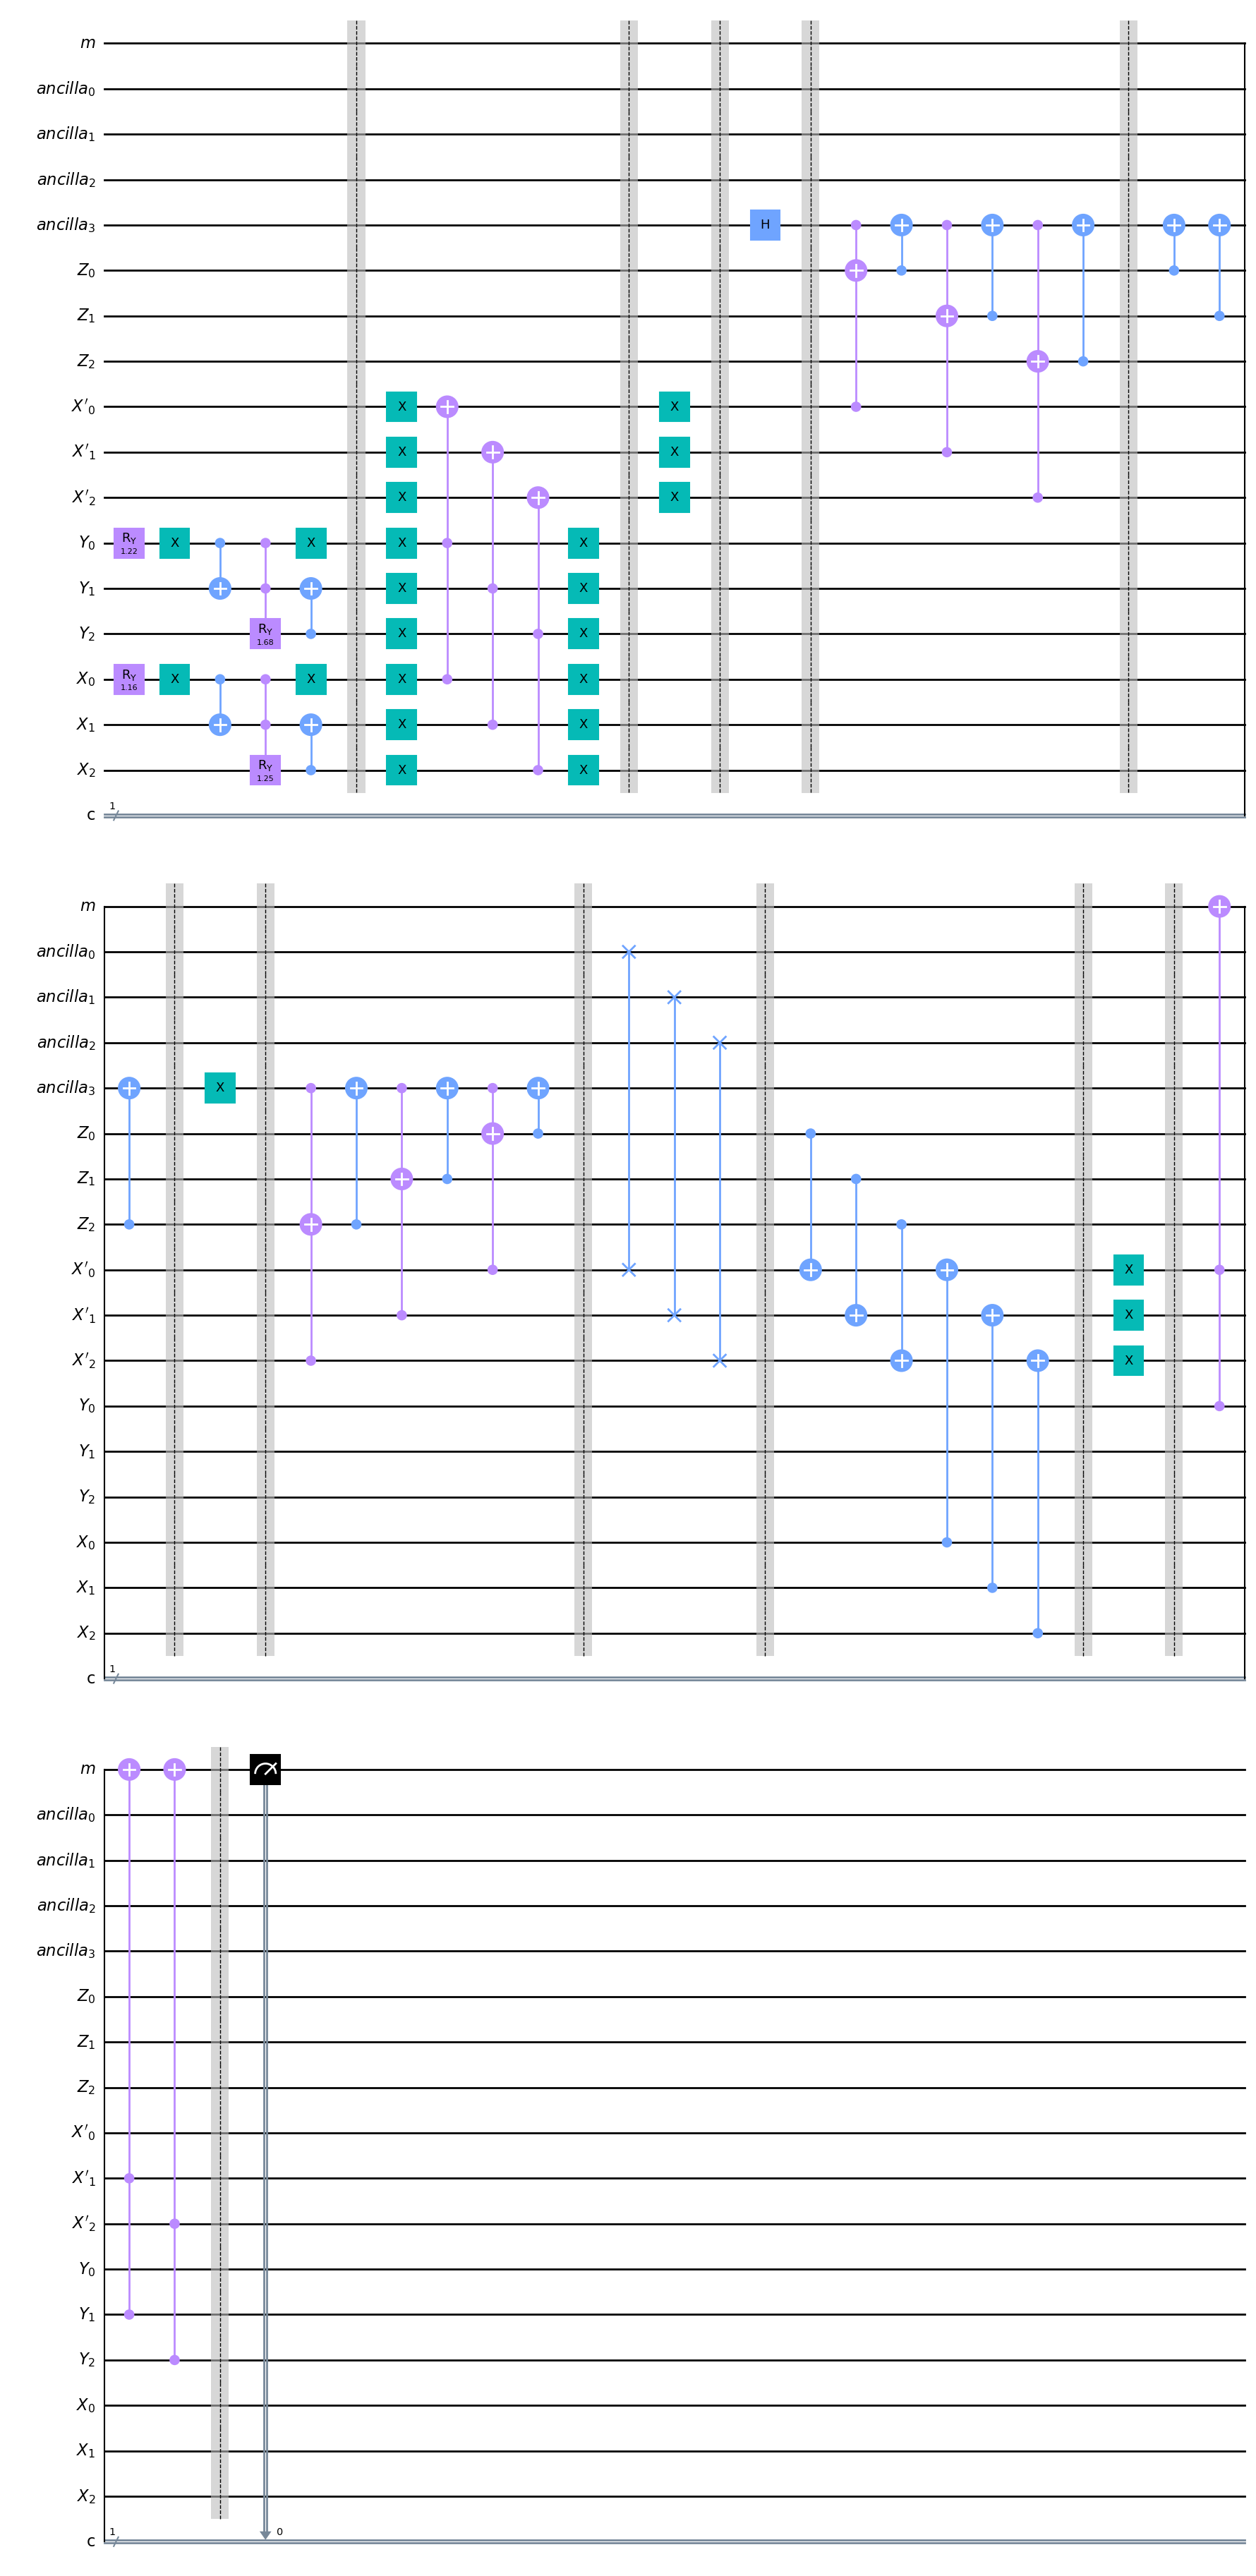

In [13]:
np.random.seed(1024)
p = np.random.rand(3)
p /= np.sum(p)
q = np.random.rand(3)
q /= np.sum(q)
# p = [0.5, 0, 0.5]
# q = [0.2, 0.3, 0.5]
print('X distribution: {}\nY distribution: {}'.format(p, q))
qc = monty_hall_circuit(p, q, barrier=True, marking_bit=True)
qc.barrier()
cr = ClassicalRegister(1, 'c')
qc.add_register(cr)
qc.measure(0, cr)
qc.draw('mpl')

{'1': 67356, '0': 32644}
P(X'=Y)=0.67356, 100000 samples
P(X'=Y)=0.6748287899499099 (theoretical)
CPU times: total: 1.94 s
Wall time: 160 ms


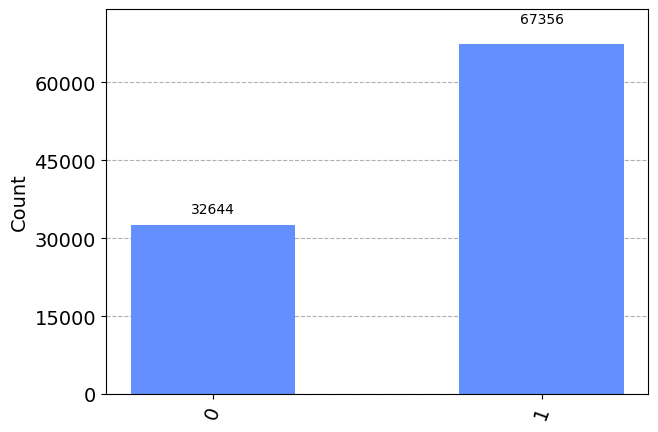

In [14]:
%%time
n_shots = 100000
qc_compiled = transpile(qc, backend)
job_sim = backend.run(qc_compiled, shots=n_shots)
result_sim = job_sim.result()

counts = result_sim.get_counts(qc_compiled)
print(counts)
print('P(X\'=Y)={}, {} samples'.format(counts['1'] / n_shots, n_shots))

print('P(X\'=Y)={} (theoretical)'.format(1 - p @ q))

plot_histogram(counts)

## Closing Remarks
Applying the quantum amplitude estimation (QAE) technique, the sample means can converge to $P(X'=Y)$ faster.